## Seaborn

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect("../ex00/data/checking-logs.sqlite")

In [3]:
dt = pd.read_sql("SELECT * FROM checker", conn)
dt

,index,status,success,timestamp,numTrials,labname,uid
0,0,checking,0,2020-04-16 21:12:50.740474,5,None,admin_1
1,1,ready,0,2020-04-16 21:12:54.708365,5,code_rvw,admin_1
2,2,checking,0,2020-04-16 21:46:47.769088,7,None,admin_1
3,3,ready,0,2020-04-16 21:46:48.121217,7,lab02,admin_1
4,4,checking,0,2020-04-16 21:53:01.862637,6,code_rvw,admin_1
...,...,...,...,...,...,...,...
3397,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3398,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3399,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3400,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [4]:
query = """
SELECT uid, timestamp, numTrials
FROM checker
WHERE uid LIKE 'user_%' 
AND labname = 'project1' 
AND status = 'ready'
"""
df = pd.read_sql(query, conn)
df

,uid,timestamp,numTrials
0,user_4,2020-04-17 05:19:02.744528,1
1,user_4,2020-04-17 05:22:45.549397,2
2,user_4,2020-04-17 05:34:24.422370,3
3,user_4,2020-04-17 05:43:27.773992,4
4,user_4,2020-04-17 05:46:32.275104,5
...,...,...,...
946,user_19,2020-05-15 10:22:39.698523,26
947,user_19,2020-05-15 10:22:46.248162,27
948,user_19,2020-05-15 10:23:18.043212,28
949,user_28,2020-05-15 10:38:14.430013,27


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='uid')
df

,uid,timestamp,numTrials
926,user_1,2020-05-14 21:21:00.651643,8
907,user_1,2020-05-14 21:12:49.812670,6
886,user_1,2020-05-14 20:56:08.898880,1
888,user_1,2020-05-14 20:58:46.322457,3
928,user_1,2020-05-14 21:23:00.570667,9
...,...,...,...
747,user_8,2020-05-14 15:50:51.715993,2
905,user_8,2020-05-14 21:12:17.314337,8
762,user_8,2020-05-14 16:11:00.491523,3
833,user_8,2020-05-14 17:40:47.781946,6


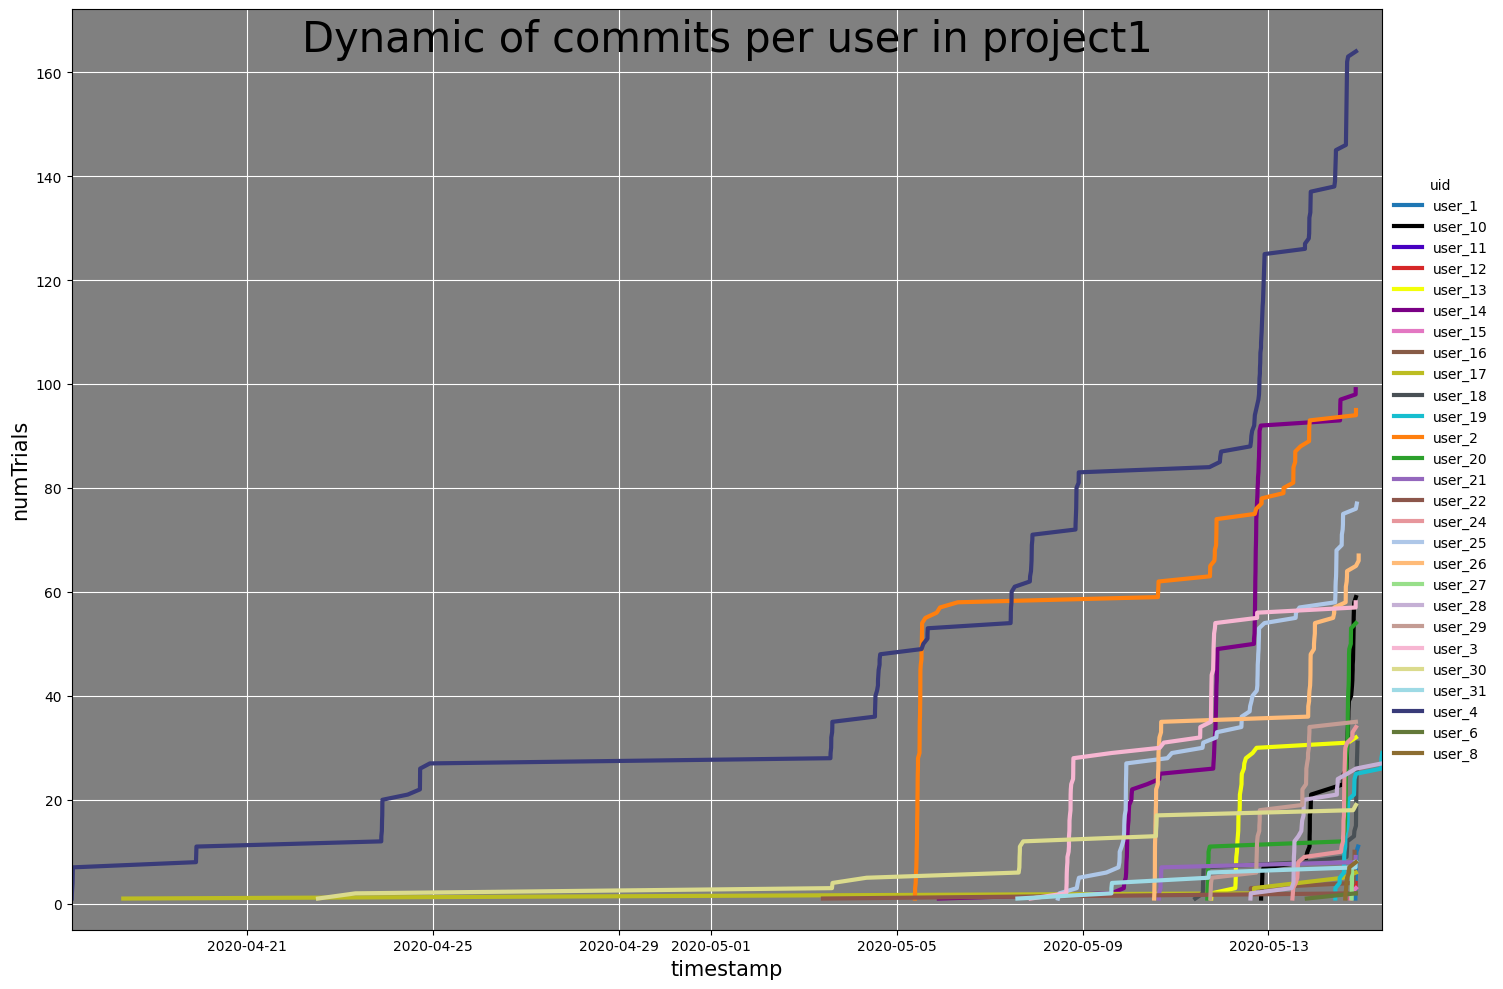

In [6]:
plt.figure(figsize=(15, 10))
custom_palette = [
    '#1f77b4', '#000000', '#4700c1', '#d62728', '#f3ff09',
    '#7a0085', '#e377c2', '#875B46', '#bcbd22', '#495055',
    '#17becf', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b',
    '#e7969c', '#aec7e8', '#ffbb78', '#98df8a', '#c5b0d5',
    '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5', '#393b79',
    '#637939', '#8c6d31'
]
sns.lineplot(data=df, x='timestamp', y='numTrials', hue='uid', linewidth=3, palette=custom_palette)

plt.xlabel('timestamp', fontsize=15)
plt.ylabel('numTrials', fontsize=15)
plt.grid(True, color='white')
plt.gca().set_facecolor('gray') # gray #F0F4F8
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.xlim(df['timestamp'].min(), df['timestamp'].max())
plt.ylim(bottom=-5)

plt.text(
    x=df['timestamp'].min() + (df['timestamp'].max() - df['timestamp'].min()) / 2,
    y=df['numTrials'].max() * 1,
    s='Dynamic of commits per user in project1',
    fontsize=30,
    ha='center'
)
plt.legend(title='uid', loc='center right', bbox_to_anchor=(1.09, 0.5), frameon=False)
plt.tight_layout()

### Connection closed

In [7]:
conn.close()

### Answer the questions

- **Which user was the leader in the number of commits almost all of the time?** - `user_4`
- **Which user was the leader for only a short period of time?** - `user_2`